In [2]:
import numpy as np
import pandas as pd
import sys
import os
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.feature_selection import UnsupervisedFeatureSelection as unsup_fs
from src.plotting import plot_pairwise_correlations

In [3]:
proc = GatherFeatureDatasets(is_p=True)

In [4]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
all_train_df = pd.read_csv(f'{data_dir}/p.train.csv')

In [18]:
# Use station YUF for experimenting with models because it has 1433 training examples, 
# which is ~half as much as YNR, so training should go faster. But should still be enough 
# examples for training good models. It is also one of the stations with a 
# UUSS correction, so already used for magnitude calculations and amplitudes should be good quality. 
stat = "YUF"
station_feature_dict, station_meta_dict, feature_names = proc.process_station_datasets(stat, 
                                                                                        all_train_df,
                                                                                        scaler=False,
                                                                                        linear_model=False,
                                                                                        source_dist_type='dist')

YUF
X shape: (1433, 45), y shape: (1433,)


In [19]:
X = station_feature_dict['X_train']
y = station_meta_dict['y_train']

In [22]:
kept_features = unsup_fs.remove_highly_correlated_features(X, thresh=0.85)

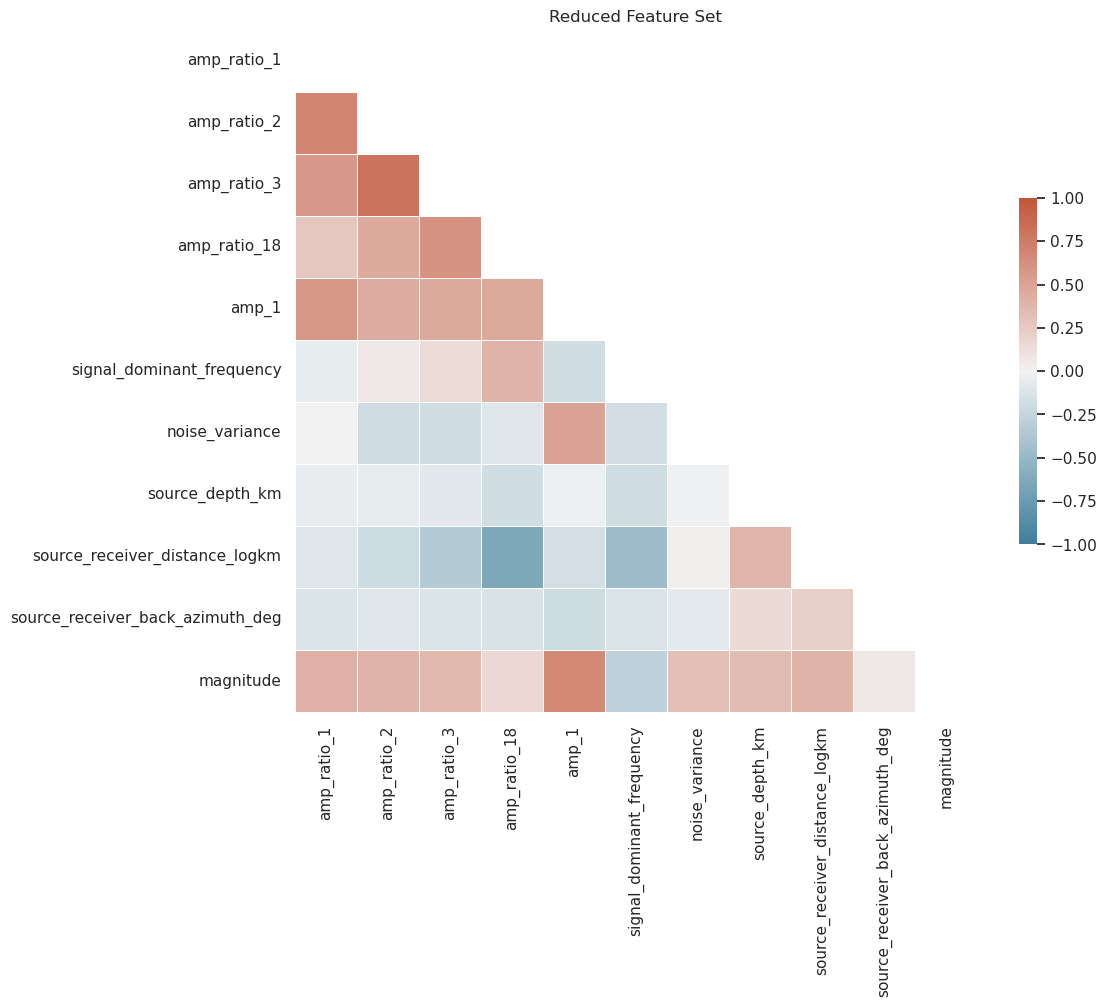

In [23]:
kept_feature_names = feature_names[kept_features]
plot_pairwise_correlations(X[:, kept_features], y, kept_feature_names, "Reduced Feature Set",
                           xticklabels=1)

In [24]:
pd.DataFrame(X[:, kept_features]).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.689310,0.569201,0.272063,0.571096,-0.051648,0.001828,-0.044071,-0.104768,-0.120197
1,0.689310,1.000000,0.797657,0.455939,0.452041,0.059244,-0.193375,-0.053305,-0.208487,-0.094386
2,0.569201,0.797657,1.000000,0.602732,0.467289,0.137825,-0.185537,-0.081690,-0.343534,-0.123498
3,0.272063,0.455939,0.602732,1.000000,0.461334,0.404565,-0.097529,-0.174853,-0.637185,-0.138802
4,0.571096,0.452041,0.467289,0.461334,1.000000,-0.172323,0.503367,-0.030010,-0.163514,-0.199733
5,-0.051648,0.059244,0.137825,0.404565,-0.172323,1.000000,-0.169774,-0.189242,-0.471507,-0.125625
6,0.001828,-0.193375,-0.185537,-0.097529,0.503367,-0.169774,1.000000,-0.014714,0.023956,-0.074791
7,-0.044071,-0.053305,-0.081690,-0.174853,-0.030010,-0.189242,-0.014714,1.000000,0.384437,0.149565
8,-0.104768,-0.208487,-0.343534,-0.637185,-0.163514,-0.471507,0.023956,0.384437,1.000000,0.217790
9,-0.120197,-0.094386,-0.123498,-0.138802,-0.199733,-0.125625,-0.074791,0.149565,0.217790,1.000000
